In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import Ridge, Lasso

In [ ]:
df_raw  = pd.read_csv('/content/drive/MyDrive/dataset/store_data.csv')

In [ ]:
print("🔹 First 10 rows:")
print(df_raw.head(10))

🔹 First 10 rows:
   Row_ID        Order_ID  Order_Date   Ship_Date       Ship_Mode Customer_ID  \
0       1  CA-2017-152156   11/8/2017  11/11/2017    Second Class    CG/12520   
1       2  CA-2017-152156   11/8/2017  11/11/2017    Second Class    CG/12520   
2       3  CA-2017-138688   6/12/2017   6/16/2017    Second Class    DV/13045   
3       4  US-2016-108966  10/11/2016  10/18/2016  Standard Class    SO/20335   
4       5  US-2016-108966  10/11/2016  10/18/2016  Standard Class    SO/20335   
5       6  CA-2015-115812    6/9/2015   6/14/2015  Standard Class    BH/11710   
6       7  CA-2015-115812    6/9/2015   6/14/2015  Standard Class    BH/11710   
7       8  CA-2015-115812    6/9/2015   6/14/2015  Standard Class    BH/11710   
8       9  CA-2015-115812    6/9/2015   6/14/2015  Standard Class    BH/11710   
9      10  CA-2015-115812    6/9/2015   6/14/2015  Standard Class    BH/11710   

        Product_ID       Sales  Discount  
0  FUR-BO-10001798   3929400.0      0.02  
1  FU

In [ ]:
print("\n🔹 Dataset Info:")
print(df_raw.info())


🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Row_ID       9800 non-null   int64  
 1   Order_ID     9800 non-null   object 
 2   Order_Date   9800 non-null   object 
 3   Ship_Date    9800 non-null   object 
 4   Ship_Mode    9800 non-null   object 
 5   Customer_ID  9800 non-null   object 
 6   Product_ID   9800 non-null   object 
 7   Sales        9770 non-null   float64
 8   Discount     9800 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 689.2+ KB
None


In [ ]:
print("\n🔹 Summary:")
print(df_raw.describe())


🔹 Summary:
            Row_ID         Sales     Discount
count  9800.000000  9.770000e+03  9800.000000
mean   4900.500000  3.472114e+06     0.020097
std    2829.160653  9.412259e+06     0.008121
min       1.000000  2.112000e+04     0.010000
25%    2450.750000  2.619000e+05     0.010000
50%    4900.500000  8.236500e+05     0.020000
75%    7350.250000  3.167520e+06     0.030000
max    9800.000000  3.395772e+08     0.030000


In [ ]:
df_raw.apply(lambda x : len(x.unique()))  #unique value counts from all the columns

,0
Row_ID,9800
Order_ID,4922
Order_Date,1230
Ship_Date,1326
Ship_Mode,4
Customer_ID,793
Product_ID,1861
Sales,5736
Discount,3


In [ ]:
df_raw.duplicated().sum() #Checking whether it is duplicated or not

np.int64(0)

In [ ]:
df_raw.info() #Data types and Non-null count of all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Row_ID       9800 non-null   int64  
 1   Order_ID     9800 non-null   object 
 2   Order_Date   9800 non-null   object 
 3   Ship_Date    9800 non-null   object 
 4   Ship_Mode    9800 non-null   object 
 5   Customer_ID  9800 non-null   object 
 6   Product_ID   9800 non-null   object 
 7   Sales        9770 non-null   float64
 8   Discount     9800 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 689.2+ KB


In [ ]:
cat_col = []
for x in df_raw.dtypes.index:
    if df_raw.dtypes[x] == 'object':
        cat_col.append(x)
display(cat_col)

#Data Cleaning
#Printing the column with have "object" datatype

['Order_ID',
 'Order_Date',
 'Ship_Date',
 'Ship_Mode',
 'Customer_ID',
 'Product_ID']

In [ ]:
cat_col.remove('Customer_ID')
cat_col.remove('Product_ID')
#Removing the columns from the list  since the both columns doesn't need any cleaning

In [ ]:
display(cat_col)

['Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode']

In [ ]:
for col in cat_col:
    print(col)
    print(df_raw[col].value_counts(),'\n')
    print('-'*55)
#Checking  the value counts of the columns from the list


Order_ID
Order_ID
CA-2018-100111    14
CA-2018-157987    12
US-2017-108504    11
CA-2017-165330    11
US-2016-126977    10
                  ..
CA-2018-139619     1
CA-2017-101343     1
CA-2018-120999     1
CA-2018-107727     1
CA-2016-106320     1
Name: count, Length: 4922, dtype: int64 

-------------------------------------------------------
Order_Date
Order_Date
9/5/2017      38
11/10/2017    35
12/1/2018     34
12/2/2018     34
12/9/2018     33
              ..
9/13/2018      1
1/24/2016      1
4/13/2017      1
3/14/2018      1
5/9/2016       1
Name: count, Length: 1230, dtype: int64 

-------------------------------------------------------
Ship_Date
Ship_Date
9/26/2018     34
12/6/2018     32
12/16/2016    31
9/15/2018     30
12/12/2018    30
              ..
8/31/2018      1
10/25/2016     1
3/3/2015       1
6/5/2017       1
5/13/2016      1
Name: count, Length: 1326, dtype: int64 

-------------------------------------------------------
Ship_Mode
Ship_Mode
Standard Class    585

In [ ]:
print(df_raw.isnull().sum())

Row_ID          0
Order_ID        0
Order_Date      0
Ship_Date       0
Ship_Mode       0
Customer_ID     0
Product_ID      0
Sales          30
Discount        0
dtype: int64


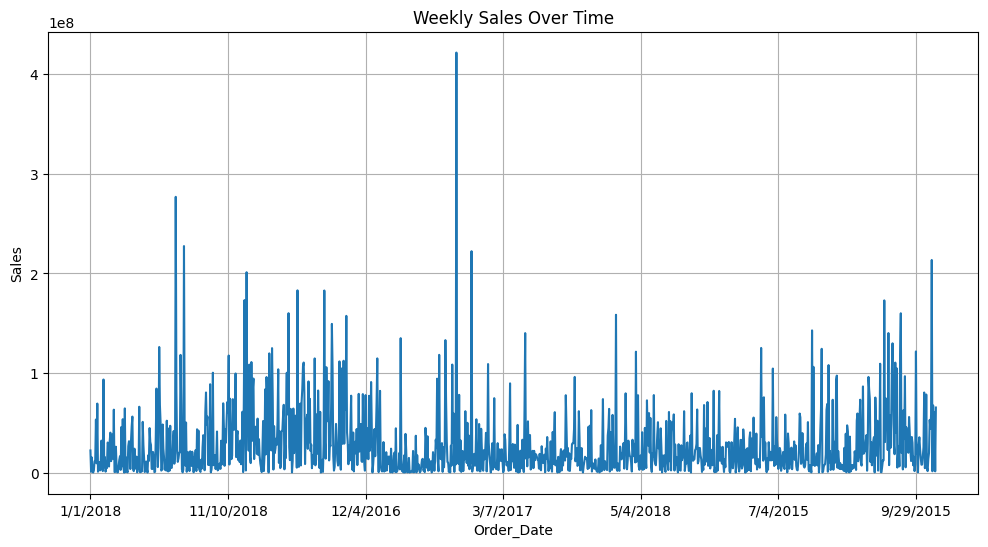

In [ ]:
plt.figure(figsize=(12,6))
df_raw.groupby('Order_Date')['Sales'].sum().plot()
plt.title('Weekly Sales Over Time')
plt.xlabel('Order_Date')
plt.ylabel('Sales')
plt.grid()
plt.show()


In [ ]:
for df_temp in [df_raw]:
    df_temp['Order_Date'] = pd.to_datetime(df_temp['Order_Date'], errors='coerce')
    df_temp['Ship_Date'] = pd.to_datetime(df_temp['Ship_Date'], errors='coerce')

    df_temp['Order_Year'] = df_temp['Order_Date'].dt.year
    df_temp['Order_Month'] = df_temp['Order_Date'].dt.month
    df_temp['Order_Day'] = df_temp['Order_Date'].dt.day
    df_temp['Order_Weekday'] = df_temp['Order_Date'].dt.dayofweek

    df_temp['Ship_Year'] = df_temp['Ship_Date'].dt.year
    df_temp['Ship_Month'] = df_temp['Ship_Date'].dt.month
    df_temp['Ship_Day'] = df_temp['Ship_Date'].dt.day
    df_temp['Ship_Weekday'] = df_temp['Ship_Date'].dt.dayofweek

    df_temp.drop(['Order_Date', 'Ship_Date'], axis=1, inplace=True)

In [ ]:
df = pd.get_dummies(df_raw, columns=['Ship_Mode'], drop_first=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_customer = LabelEncoder()
le_product = LabelEncoder()

df['Customer_ID'] = le_customer.fit_transform(df['Customer_ID'])
df['Product_ID'] = le_product.fit_transform(df['Product_ID'])

In [ ]:
X = df.drop(['Row_ID', 'Order_ID', 'Sales'], axis=1)
y = df['Sales']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
print(y_train.isna().sum())
not_nan_idx = y_train.notna()
X_train = X_train.loc[not_nan_idx]
y_train = y_train.loc[not_nan_idx]


27


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
not_nan_idx = (~y_test.isna()) & (~np.isnan(y_pred))

y_test_clean = y_test[not_nan_idx]
y_pred_clean = y_pred[not_nan_idx]

mae = mean_absolute_error(y_test_clean, y_pred_clean)
rmse = np.sqrt(mean_squared_error(y_test_clean, y_pred_clean))
r2 = r2_score(y_test_clean, y_pred_clean)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 4558419.80
RMSE: 12276035.46
R²: -0.00


In [ ]:
results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

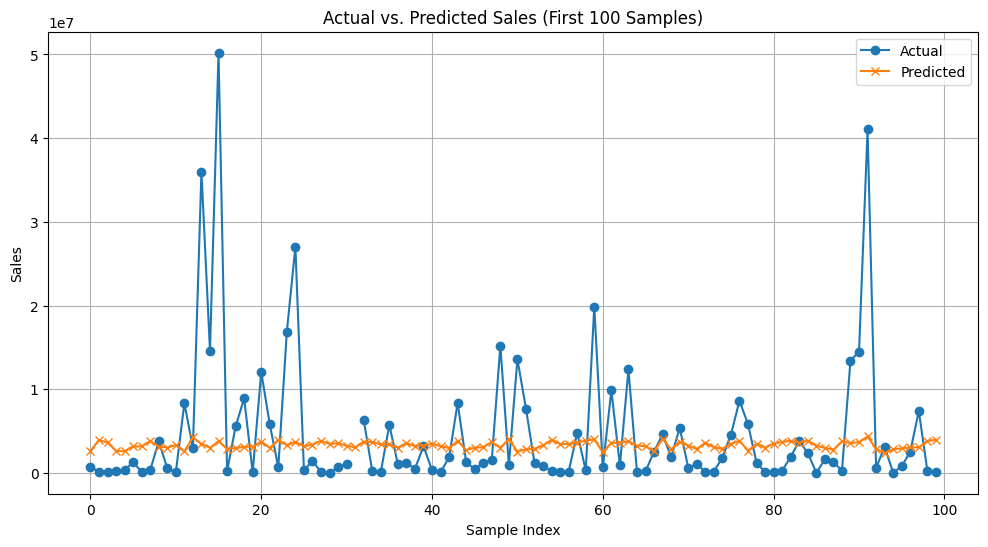

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(results['Actual'].values[:100], label='Actual', marker='o')
plt.plot(results['Predicted'].values[:100], label='Predicted', marker='x')
plt.title('Actual vs. Predicted Sales (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

In [ ]:
df_features = df.copy()



In [ ]:
df_ts = pd.read_csv('/content/drive/MyDrive/dataset/store_data.csv')
df_ts['Order_Date'] = pd.to_datetime(df_ts['Order_Date'], errors='coerce')
df_ts.dropna(subset=['Order_Date', 'Sales'], inplace=True)
df_ts.set_index('Order_Date', inplace=True)
weekly_sales = df_ts['Sales'].resample('W').sum()
train_size = int(len(weekly_sales) * 0.8)
train, test = weekly_sales[:train_size], weekly_sales[train_size:]
model = ARIMA(train, order=(3, 1, 2))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))



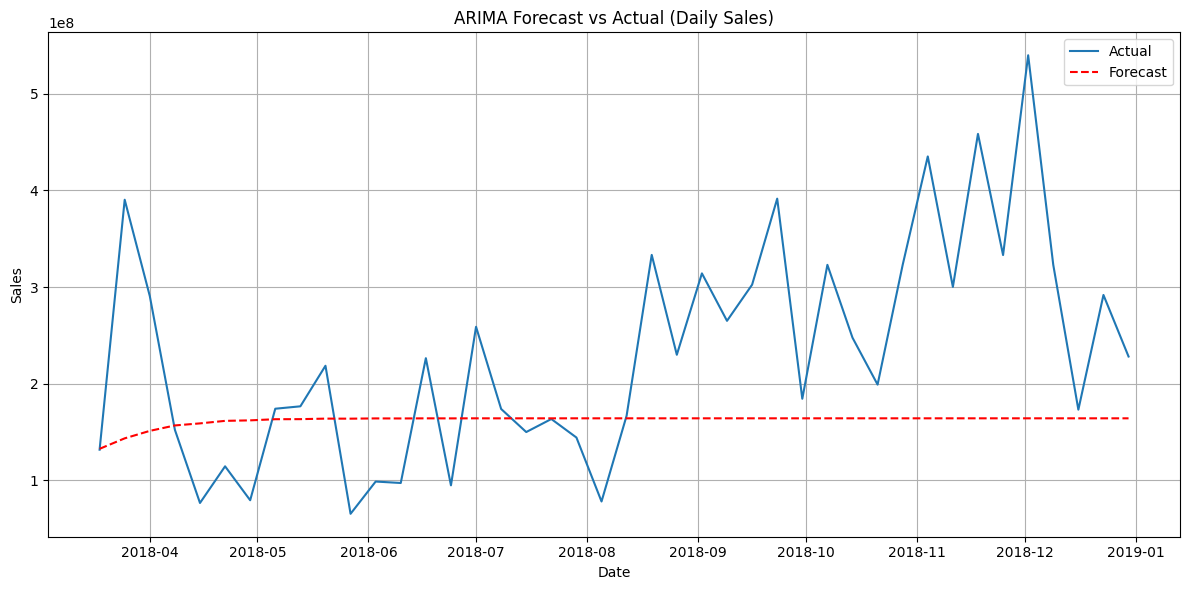

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', color='red', linestyle='--')
plt.title('ARIMA Forecast vs Actual (Daily Sales)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('arima_forecast_daily.png')
plt.show()


In [ ]:
test_size = 0.2
print(f"\n➡️ Train/Test Split: {int((1-test_size)*100)}%/{int(test_size*100)}%")
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")



➡️ Train/Test Split: 80%/20%
MAE: 4558419.80, RMSE: 12276035.46, R²: -0.00


In [ ]:
df_raw['Is_Weekend'] = df_raw['Order_Weekday'].apply(lambda x: 1 if x >= 5 else 0)
df_raw['Quarter'] = df_raw['Order_Month'].apply(lambda x: (x - 1) // 3 + 1)
df_raw['Is_Holiday_Season'] = df_raw['Order_Month'].apply(lambda x: 1 if x in [11, 12] else 0)


In [ ]:
train_df = pd.concat([X_train, y_train], axis=1).dropna()
X_train_clean = train_df.drop('Sales', axis=1)
y_train_clean = train_df['Sales']

In [ ]:
X_train_filled = X_train.fillna(0)  # or use mean/median
y_train_filled = y_train.fillna(0)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)
X_test_scaled = scaler.transform(X_test)

In [ ]:
ridge = Ridge()
lasso = Lasso()

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)
lasso_pred = lasso.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.772e+17, tolerance: 5.699e+13
  model = cd_fast.enet_coordinate_descent(


In [ ]:
mask = (~np.isnan(y_test)) & (~np.isnan(ridge_pred)) & (~np.isnan(lasso_pred))
y_test_clean = y_test[mask]
ridge_clean = ridge_pred[mask]
lasso_clean = lasso_pred[mask]

In [ ]:
print("\n🔹 Ridge Regression")
print(f"MAE: {mean_absolute_error(y_test_clean, ridge_clean):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_clean, ridge_clean)):.2f}")
print(f"R²: {r2_score(y_test_clean, ridge_clean):.2f}")

print("\n🔹 Lasso Regression")
print(f"MAE: {mean_absolute_error(y_test_clean, lasso_clean):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_clean, lasso_clean)):.2f}")
print(f"R²: {r2_score(y_test_clean, lasso_clean):.2f}")


🔹 Ridge Regression
MAE: 4554468.24
RMSE: 12272861.73
R²: -0.00

🔹 Lasso Regression
MAE: 4558806.57
RMSE: 12276450.60
R²: -0.00
